# Homework H3.4
By: Markus Limbacher & Lucas Krauter

## Preperations
### Import of libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy

### Dataset

In [2]:
# Dataset declaration
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

np.random.seed(42)

# Number of clusters ==> k
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

### Display dataset 

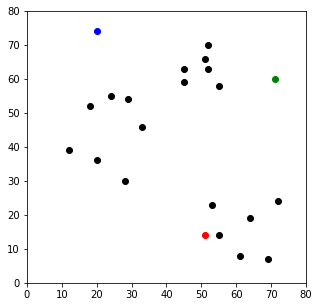

In [3]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## K-Means manually
### Assignment Stage

In [4]:
# Function to determine closest centroid
def assignment(df, centroids):
    
    # Iterating over every centroid
    for i in centroids.keys():
        # distance function: sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df)

     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        46.324939        62.625873        35.902646        3     b
1   20  36        38.013156        56.364883        38.000000        3     b
2   28  30        28.017851        52.430907        44.721360        1     r
3   18  52        50.328918        53.600373        22.090722        3     b
4   29  54        45.650849        42.426407        21.931712        3     b
5   33  46        36.715120        40.496913        30.870698        3     b
6   24  55        49.091751        47.265209        19.416488        3     b
7   45  59        45.398238        26.019224        29.154759        2     g
8   45  63        49.365980        26.172505        27.313001        2     g
9   52  70        56.008928        21.470911        32.249031        2     g
10  51  66        52.000000        20.880613        32.015621        2     g
11  52  63        49.010203        19.235384        33.837849        2     g

### Display modified dataset with color assigned to closest centroid.

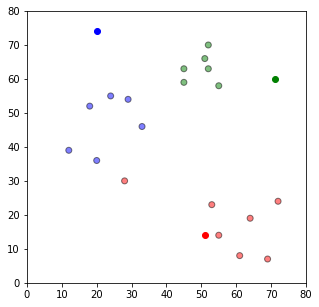

In [5]:
def displayDataset(df, centroids):
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
    
displayDataset(df, centroids)

### Update Stage

In [6]:
# Copies current centroids for demonstration purposes
old_centroids = copy.deepcopy(centroids)

# Calculate mean from each seperate cluster as new centroids
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)

### Display updated centroids

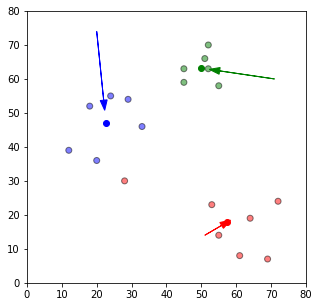

In [7]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

### Repeat Assigment

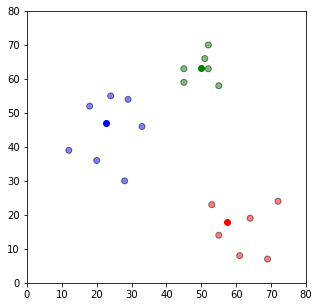

In [8]:
df = assignment(df, centroids)

# Plot results
displayDataset(df, centroids)

### Loop until all assigned categories don't change any more

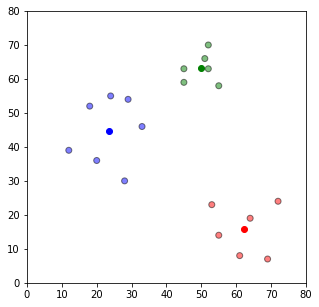

In [9]:

while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

displayDataset(df, centroids)

## K-Means using scikit-learn
### Preparations

In [10]:
# Dataset
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

# Import K-Means library
from sklearn.cluster import KMeans

### Executing K-Means function

In [11]:
# 3 Clusters
kmeans = KMeans(n_clusters=3)

# Fitting K-Means modell
print(kmeans.fit(df))

KMeans(n_clusters=3)


In [12]:
# Using modell to label dataset
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

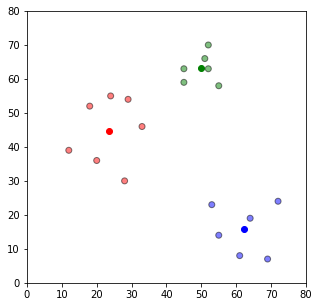

In [13]:
# Display result
fig = plt.figure(figsize=(5, 5))

colors =list( map(lambda x: colmap[x+1], labels))


plt.scatter(df['x'], df['y'],color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()